<a href="https://colab.research.google.com/github/Vishu1234-bit/DevPgm/blob/master/Sparks_foundation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Retrieving data from url

In [20]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(url)
print("Retrieved data successfully")
student_data.head(10)

Retrieved data successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting data 

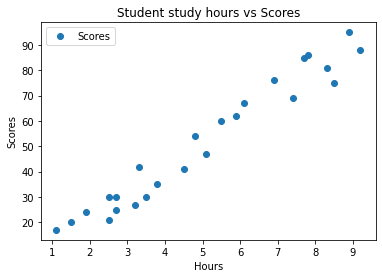

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
student_data.plot('Hours','Scores',style='o')
plt.title("Student study hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

Splitting data into Training and testing sets 

In [82]:
x = student_data.iloc[:,1].values
x

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [49]:
y = student_data.iloc[:,1]
y.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)
print("training dataset for hours ",x_train)
print("testing dataset for hours ",x_test)
print("training dataset for scores",y_train)
print("testing dataset for scores",y_test)

training dataset for hours  [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
testing dataset for hours  [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
training dataset for scores 22    35
17    24
24    86
23    76
14    17
1     47
10    85
13    42
8     81
6     88
18    67
4     30
9     25
7     60
20    30
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64
testing dataset for scores 5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64


Training model

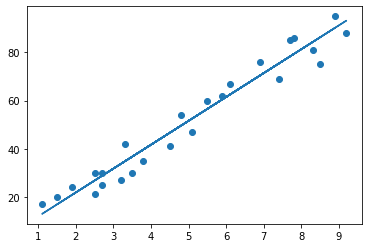

In [64]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
eqnline = regressor.coef_ *x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,eqnline)
plt.show()

In [65]:
print("Training complete")

Training complete


Predictions

In [66]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [67]:
y_pred = regressor.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [68]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [76]:
hours =[[9.25]] 
score_pred = regressor.predict(hours)
print("Number of hours = ",hours[0][0])
print("Predicted score = ",score_pred[0])


Number of hours =  9.25
Predicted score =  93.69173248737539


Evaluating model

In [80]:
from sklearn import metrics
print("Mean absolute error = ",metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error =  4.183859899002982
